In [3]:
# 필요한 라이브러리 설치 (처음 한 번만 실행)
!pip install numpy pandas matplotlib seaborn scipy scikit-learn statsmodels pingouin scikit_posthocs xgboost -q

print("라이브러리 설치 완료!")

라이브러리 설치 완료!


In [4]:
# 데이터 처리 및 분석
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import warnings

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 통계 분석
from scipy import stats
from scipy.stats import shapiro, levene, ttest_ind, chi2_contingency, f_oneway
from scipy.stats import mannwhitneyu, fisher_exact, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import pingouin as pg
import scikit_posthocs as sp

# 출력 설정
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# 한글 폰트 설정
import platform
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 6)

# 시드 설정
np.random.seed(42) # 팀원간의 결과물이 동일하게 보일 수 있음

print("="*60)
print("라이브러리 로드 완료!")
print("한글 폰트 설정 완료!")
print("="*60)

라이브러리 로드 완료!
한글 폰트 설정 완료!


In [5]:
import os
os.chdir(r"C:\Users\lizzy\스파르타_파이썬\심화플젝")
print(os.getcwd())  # 잘 바뀌었는지 확인


C:\Users\lizzy\스파르타_파이썬\심화플젝


In [6]:
# 데이터 로드
df_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
df_order_items = pd.read_csv('olist_order_items_dataset.csv')
df_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_customers = pd.read_csv('olist_customers_dataset.csv')
df_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
df_sellers = pd.read_csv('olist_sellers_dataset.csv')
df_product_translate = pd.read_csv('product_category_name_translation.csv')
df_products = pd.read_csv('olist_products_dataset.csv')

print("="*60)
print("데이터 로드 완료!")
print("="*60)
print(f"\ngeolocation: {df_geolocation.shape}")
print(f"order_items: {df_order_items.shape}")
print(f"order_items: {df_products.shape}")
print(f"order_reviews: {df_order_reviews.shape}")
print(f"orders: {df_orders.shape}")
print(f"customers: {df_customers.shape}")
print(f"order_payments: {df_order_payments.shape}")
print(f"sellers: {df_sellers.shape}")
print(f"products: {df_products.shape}")
print(f"product_translate: {df_product_translate.shape}")




데이터 로드 완료!

geolocation: (1000163, 5)
order_items: (112650, 7)
order_items: (32951, 9)
order_reviews: (99224, 7)
orders: (99441, 8)
customers: (99441, 5)
order_payments: (103886, 5)
sellers: (3095, 4)
products: (32951, 9)
product_translate: (71, 2)


# df_geolocation

In [7]:
print(df_geolocation.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None


In [8]:
print(df_geolocation.isna().sum())

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


# df_order_items

In [9]:
print(df_order_items.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


order_item_id: 같은 주문(order_id) 안에서 몇 번째 상품인지 나타내는 순번

shipping_limit_date: 각 상품에 대해 판매자가 발송을 완료해야 하는 마감 시한(-> 배송 지연에 대한 인사이트 얻을 수 있는 컬럼)

freight_value : 각 주문 아이템별로 책정된 배송비 금액(주문(order_id)에 상품이 여러 개 들어 있을 경우, 그 주문 전체에 대한 배송비를 각 상품별로 나눠 기록한다는 뜻입니다.)

In [10]:
print(df_order_items.isna().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [11]:
df_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


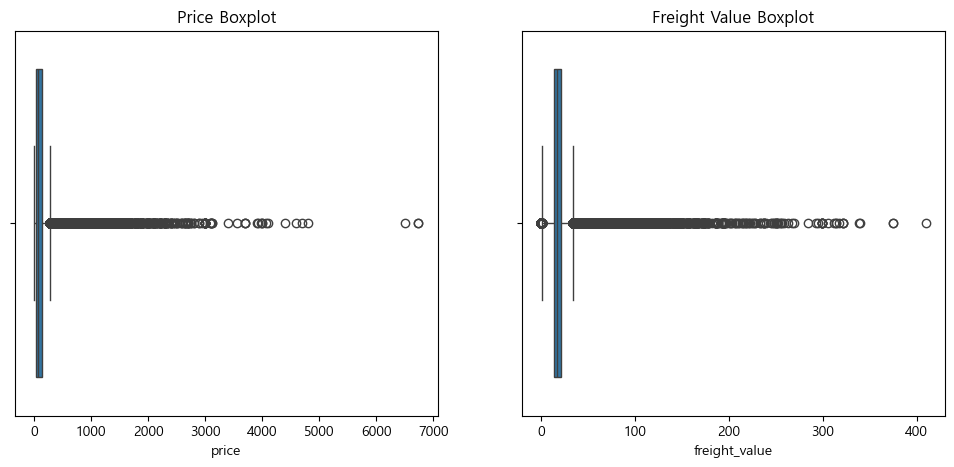

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x=df_order_items['price'], ax=axes[0])
sns.boxplot(x=df_order_items['freight_value'], ax=axes[1])
axes[0].set_title('Price Boxplot')
axes[1].set_title('Freight Value Boxplot')
plt.show()


# df_order_reviews

In [13]:
print(df_order_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


In [14]:
print(df_order_reviews.isna().sum())

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


review_score: 1 to 5 given by the customer on a satisfaction survey.

review_comment_title: Comment title from the review left by the customer, 포르투갈어

review_comment_message: 포르투갈어

review_creation_date: 고객에게 만족도 조사(리뷰 요청 설문)가 발송된 날짜·시간을 기록한 컬럼

review_answer_timestamp: 고객이 실제로 만족도 조사(리뷰 요청 설문)에 응답한 날짜와 시간

# df_orders

In [15]:
print(df_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


In [16]:
print(df_orders.isna().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


customer_id: Each order has a unique customer_id

order_status: 주문 상태.(범주형!) delivered(배송 완료), invoiced(송장 발행됨), shipped(배송 중), processing(처리 중), unavailable(재고 없음), canceled(취소됨), created(주문 생성됨), approved(승인됨).

✨order_purchase_timestamp: 고객이 주문을 생성한 날짜와 시간. (구매 시점)

✨order_approved_at: 결제가 승인된 날짜와 시간. (일부 주문은 결제 승인이 늦게 이루어질 수 있음)

✨order_delivered_carrier_date: 판매자가 상품을 운송사(carrier)에 넘긴 날짜와 시간. (즉, 배송 시작 시점)

✨order_delivered_customer_date:	고객에게 실제로 배송이 완료된 날짜와 시간.

✨ order_estimated_delivery_date:시스템이 예측한 예상 배송 완료 날짜. (실제 배송일과 비교하여 SLA 분석 가능)

In [17]:
df_orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

# df_customers

In [18]:
print(df_customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


In [19]:
print(df_customers.isna().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


customer_unique_id: 고객의 고유 식별자. 같은 고객이 여러 번 주문하면 customer_id는 다를 수 있지만,customer_unique_id는 동일하게 유지됨. 즉, "재구매 고객 분석" 에 유용.

customer_zip_code_prefix: 고객의 우편번호 앞자리(Zip code prefix). 브라질 지역 단위 구분에 사용됨.
customer_city: 고객이 거주하는 도시명.
customer_state	고객이 거주하는 주(State) 코드. (예: SP = São Paulo, RJ = Rio de Janeiro 등)

# df_order_payments

In [20]:
print(df_order_payments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


In [21]:
print(df_order_payments.isna().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64



order_id: 주문 고유 ID. olist_orders_dataset.csv의 order_id와 연결됨.

payment_sequential: 같은 주문에서 결제가 여러 번 발생했을 때, 결제 순서를 나타내는 번호 (1, 2, 3 …).

payment_type: 결제 수단 유형. 예: credit_card(신용카드), boleto(브라질 지불 방식, 일종의 송장/바우처), voucher(할인쿠폰), debit_card(직불카드), not_defined(정의되지 않음).

payment_installments: 결제가 몇 개의 할부로 나뉘어 있는지 나타냄. (예: 1 = 일시불, 3 = 3개월 할부)

payment_value: 해당 결제에서 실제로 지불된 금액 (브라질 헤알, BRL).

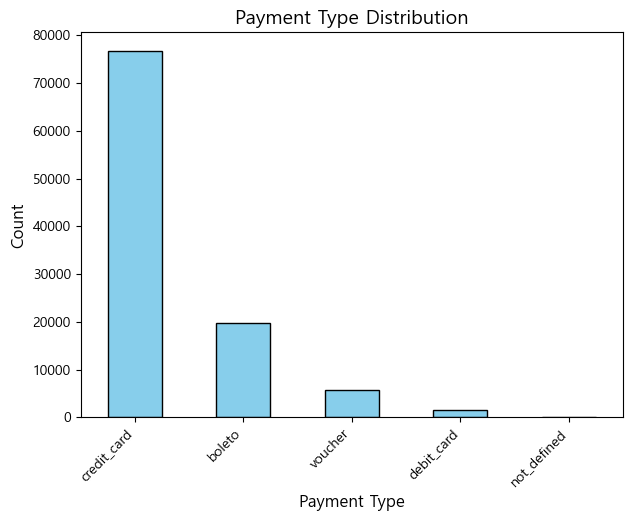

In [22]:
import matplotlib.pyplot as plt

# payment_type별 개수 집계
counts = df_order_payments['payment_type'].value_counts()

# 막대 그래프
plt.figure(figsize=(7,5))
counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Payment Type Distribution", fontsize=14)
plt.xlabel("Payment Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


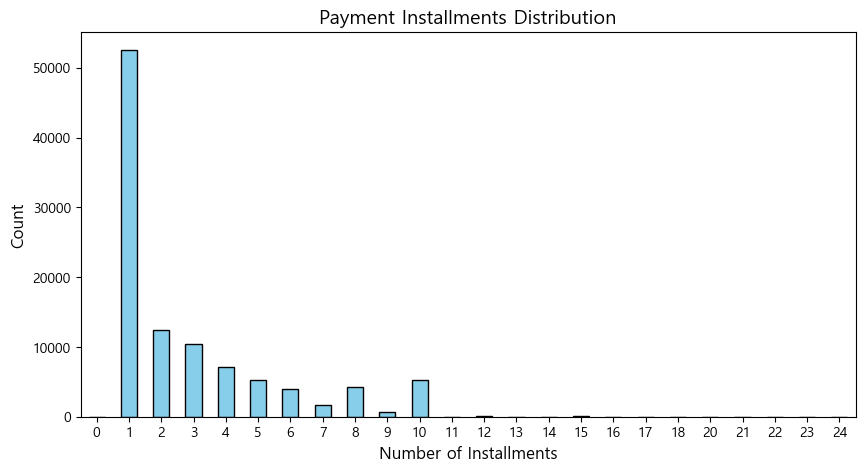

In [23]:
import matplotlib.pyplot as plt

# 각 값별 개수 집계 후 오름차순 정렬
counts = df_order_payments['payment_installments'].value_counts().sort_index()

# 막대 그래프
plt.figure(figsize=(10,5))
counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Payment Installments Distribution", fontsize=14)
plt.xlabel("Number of Installments", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.show()


In [24]:
df_order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [25]:
df_order_payments['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [26]:
df_order_payments['payment_sequential'].unique()

array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20])

In [27]:
df_order_payments['payment_installments'].unique()

array([ 8,  1,  2,  3,  6,  5,  4, 10,  7, 12,  9, 13, 15, 24, 11, 18, 14,
       20, 21, 17, 22,  0, 16, 23])

# df_sellers

In [28]:
print(df_sellers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None



seller_id	판매자를 고유하게 식별하는 ID. 다른 테이블(olist_order_items_dataset.csv)의 seller_id와 연결됨.

seller_zip_code_prefix	판매자의 우편번호 앞자리(Zip code prefix). 지역 단위 구분에 사용됨.

seller_city: 판매자가 위치한 도시명.

seller_state: 판매자가 위치한 주(State) 코드. (예: SP = São Paulo, RJ = Rio de Janeiro 등)

In [29]:
df_sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

# df_products

In [30]:
print(df_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


In [31]:
print(df_products.isna().sum())

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


# df_product_translate

In [32]:
print(df_product_translate.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None



product_category_name: 원래 상품 카테고리 이름 (포르투갈어). 예: beleza_saude (beauty_health), informatica_acessorios (computers_accessories).

product_category_name_english: 상품 카테고리 이름의 영어 번역. 예: health_beauty, computers_accessories.

In [33]:
print(df_product_translate.isna().sum())

product_category_name            0
product_category_name_english    0
dtype: int64


product_category_name_english
agro_industry_and_commerce    1
air_conditioning              1
art                           1
arts_and_craftmanship         1
audio                         1
auto                          1
baby                          1
dtype: int64


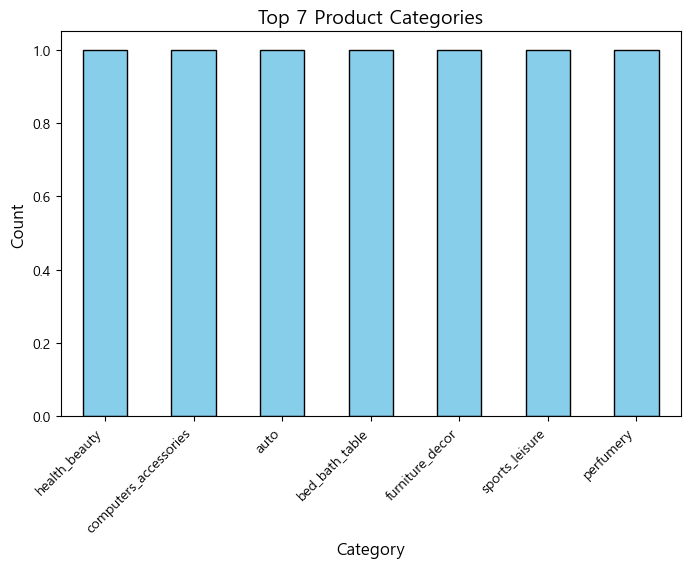

In [34]:
import matplotlib.pyplot as plt

# 상위 7개 (이미 내림차순 정렬됨)
top77 = df_product_translate.groupby('product_category_name_english').size().sort_values(ascending=False).head(7)
print(top77)
top7 = df_product_translate['product_category_name_english'].value_counts().head(7)

plt.figure(figsize=(8,5))
top7.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Top 7 Product Categories", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


In [35]:
print("\n" + "="*60)
print("중복 데이터 확인")
print("="*60)

# 전체 행 중복 확인
print("\n[전체 행 기준 중복]")
print(f"geolocation 중복: {df_geolocation.duplicated().sum():,}건")
print(f"order_items 중복: {df_order_items.duplicated().sum():,}건")
print(f"order_reviews 중복: {df_order_reviews.duplicated().sum():,}건")
print(f"orders 중복: {df_orders.duplicated().sum():,}건")
print(f"customers 중복: {df_customers.duplicated().sum():,}건")
print(f"order_payments 중복: {df_order_payments.duplicated().sum():,}건")
print(f"sellers 중복: {df_sellers.duplicated().sum():,}건")
print(f"product_translate 중복: {df_product_translate.duplicated().sum():,}건")


중복 데이터 확인

[전체 행 기준 중복]
geolocation 중복: 261,831건
order_items 중복: 0건
order_reviews 중복: 0건
orders 중복: 0건
customers 중복: 0건
order_payments 중복: 0건
sellers 중복: 0건
product_translate 중복: 0건


In [40]:
import pandas as pd


# zip code prefix 기준으로 join
df = df_customers.merge(
    df_geolocation[['geolocation_zip_code_prefix','geolocation_lat','geolocation_lng']],
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)
df[['geolocation_lat','geolocation_lng']].isna().sum()



geolocation_lat    278
geolocation_lng    278
dtype: int64

In [42]:
df_clean = df.dropna(subset=['geolocation_lat', 'geolocation_lng'])

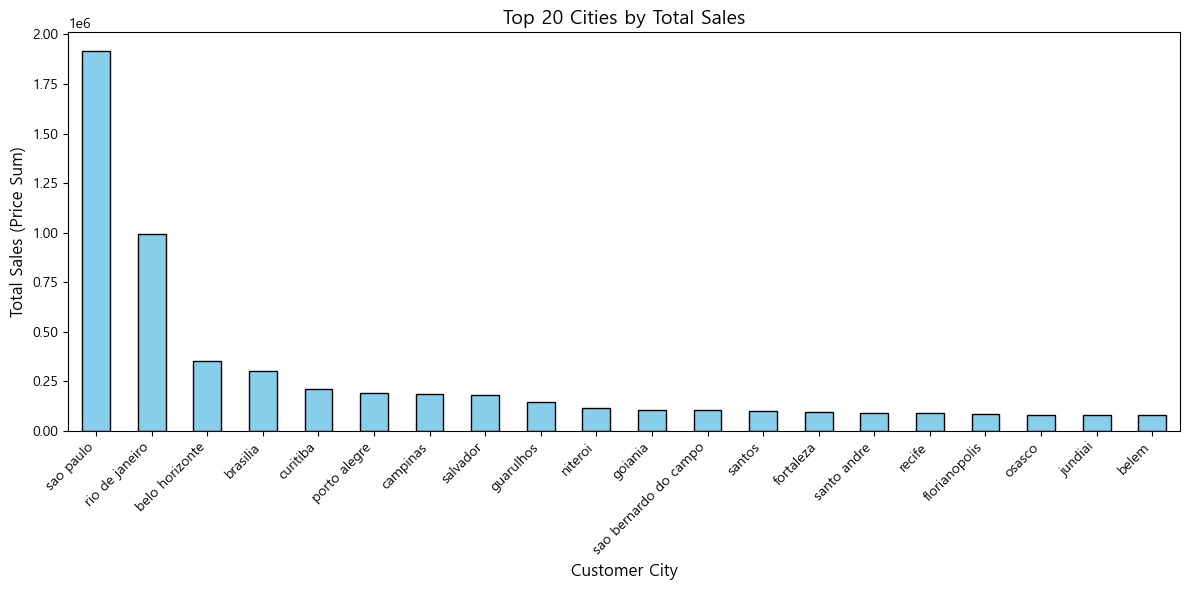

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
# 두 데이터셋을 order_id 기준으로 inner join
# customers + orders (customer_id 기준)
cust_orders = df_customers.merge(df_orders, on="customer_id", how="inner")

# cust_orders + order_items (order_id 기준)
df = cust_orders.merge(df_order_items, on="order_id", how="inner")

# city별 매출액 합계
city_sales = df.groupby("customer_city")["price"].sum().sort_values(ascending=False).head(20)

# 시각화
city_sales.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top 20 Cities by Total Sales", fontsize=14)
plt.xlabel("Customer City", fontsize=12)
plt.ylabel("Total Sales (Price Sum)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
# 막대그래프 시각화


In [53]:
import folium

# 브라질 중심 좌표
m = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# 고객 위치 찍기
for _, row in df_clean.sample(1000).iterrows():  # 샘플링해서 표시
    folium.CircleMarker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        radius=2,
        color='blue',
        fill=True,
        fill_opacity=0.5
    ).add_to(m)

m.save("customers_map.html")



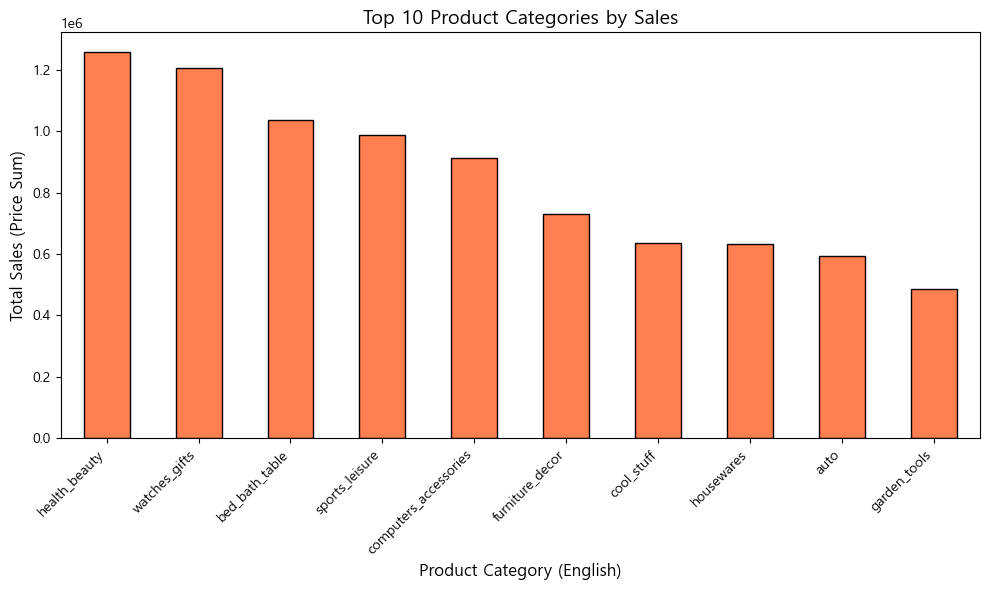

In [59]:
import pandas as pd
import matplotlib.pyplot as plt


# 1. products + translations (left join)
prod_trans = df_products.merge(
    df_product_translate,
    on="product_category_name",
    how="left"
)

# 2. prod_trans + order_items (inner join)
df = prod_trans.merge(
    df_order_items,
    on="product_id",
    how="inner"
)

# 3. 카테고리별 매출액 집계
category_sales = (
    df.groupby("product_category_name_english")["price"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

# 4. 시각화
plt.figure(figsize=(10,6))
category_sales.plot(kind="bar", color="coral", edgecolor="black")

plt.title("Top 10 Product Categories by Sales", fontsize=14)
plt.xlabel("Product Category (English)", fontsize=12)
plt.ylabel("Total Sales (Price Sum)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [61]:
import pandas as pd

# 데이터 불러오기
orders = pd.read_csv("olist_orders_dataset.csv")

# 문자열(object) → datetime 변환
df_orders["order_purchase_timestamp"] = pd.to_datetime(df_orders["order_purchase_timestamp"])
df_orders["order_delivered_customer_date"] = pd.to_datetime(df_orders["order_delivered_customer_date"])

# 배송 소요 시간 계산 (timedelta 타입)
df_orders["delivery_time"] = df_orders["order_delivered_customer_date"] - df_orders["order_purchase_timestamp"]

# 일 단위로 보고 싶다면
df_orders["delivery_days"] = df_orders["delivery_time"].dt.days


